<a href="https://colab.research.google.com/github/mich-kurt/Humira-Project/blob/main/Data_Mining_Humira_Comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
# Make an HTTP request to the URL
url = "https://www.drugs.com/comments/adalimumab/humira.html"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the content with BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')
    # Now you can work with the parsed HTML content in the 'soup' variable
else:
    print("Failed to retrieve the web page. Status code:", response.status_code)


In [9]:
paragraphs = soup.find_all('p')

# Extract and print the text from each <p> element
comments = [p.get_text() for p in paragraphs]
substring = '\nHumira\n\t\t\t\thas an average rating of 6.2 out of 10 from a total of 668 reviews\n\t\t\t\t\ton Drugs.com.\n\t\t\t\t54% of reviewers reported a positive experience, while 33% reported a negative experience.\n\t',
comments.pop(0)
del comments[25:33]




In [10]:
header = []
body = []
#Cleaning out the HTML information
for i, comment in enumerate(comments):
    parts = comment.split('\t\t\t\t\t\t\t')
    header.append(parts[0])
    body.append(parts[1])
#Creating a column to send it to a CSV for additional useage
df_header = pd.DataFrame(header, columns=['Drug Usage'])
df_body = pd.DataFrame(body, columns=['Comment'])

Table = pd.concat([df_header, df_body], axis=1)
Table.to_csv("Reviews", index = False)


In [11]:
# -> if wanted to use the CSV for analysis Reviews = pd.read_csv("Reviews")

l1 = []
disease = []
for i in Table["Drug Usage"]:
  l1.append(i)
for i in l1:
  parts = i.split("For")
  disease.append(parts[1])
print(disease)

[' Rheumatoid Arthritis ', ' Rheumatoid Arthritis ', ' Rheumatoid Arthritis ', ' Rheumatoid Arthritis ', ' Rheumatoid Arthritis ', ' Hidradenitis Suppurativa ', ' Rheumatoid Arthritis ', ' Rheumatoid Arthritis ', ' Rheumatoid Arthritis ', ' Ankylosing Spondylitis ', ' Rheumatoid Arthritis ', ' Rheumatoid Arthritis ', ' Ankylosing Spondylitis ', ' Rheumatoid Arthritis ', ' Psoriasis ', ' Rheumatoid Arthritis ', ' Ankylosing Spondylitis ', ' Rheumatoid Arthritis ', ' Rheumatoid Arthritis ', ' Rheumatoid Arthritis ', ' Rheumatoid Arthritis ', ' Ankylosing Spondylitis ', ' Psoriatic Arthritis ', ' Ankylosing Spondylitis ', " Crohn's Disease, Maintenance "]


In [ ]:
surveyers_usage = {}

for i in disease:
    if i not in surveyers_usage:
      surveyers_usage[i] = 1
    else:
      surveyers_usage[i] += 1


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ' Rheumatoid Arthritis '),
  Text(1, 0, ' Hidradenitis Suppurativa '),
  Text(2, 0, ' Ankylosing Spondylitis '),
  Text(3, 0, ' Psoriasis '),
  Text(4, 0, ' Psoriatic Arthritis '),
  Text(5, 0, " Crohn's Disease, Maintenance ")])

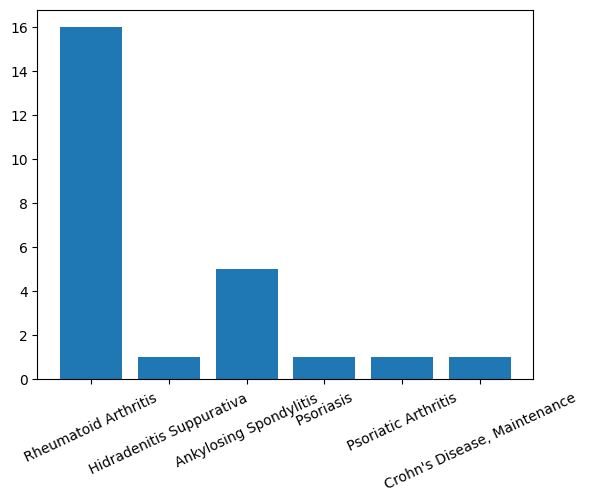

In [12]:
X = list(surveyers_usage.keys())
Y = list(surveyers_usage.values())
plt.bar(X,Y)
plt.xticks(rotation=25)  # Rotate labels by 45 degrees

In [13]:
#! pip install transformers datasets

     ━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.8/7.9 MB 10.8 MB/s eta 0:00:01
ERROR: Operation cancelled by user


In [19]:
#only run this if you have transformers installed above
#This is using hugging face models to setiment analyze the comments
'''
Table['Comment'] = Table['Comment'].str.replace('\n', '')

# Print the updated 'Comment' column
label_results = {}

for j in Table['Comment']:
  model_outputs = classifier(j)
  for i in model_outputs:
    if i['label'] not in label_results:
     label_results[i['label']] = 1
    else:
      label_results[i['label']] += 1
label_results
'''

"\nTable['Comment'] = Table['Comment'].str.replace('\n', '')\n\n# Print the updated 'Comment' column\nlabel_results = {}\n\nfor j in Table['Comment']:\n  model_outputs = classifier(j)\n  for i in model_outputs:\n    if i['label'] not in label_results:\n     label_results[i['label']] = 1\n    else:\n      label_results[i['label']] += 1\nlabel_results\n"